In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando e limpando os dados

In [3]:
raw_pagamentos = pd.read_csv('pagamentos.csv')
raw_pagamentos.info()
print(raw_pagamentos.nunique())
raw_pagamentos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427873 entries, 0 to 427872
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   data_publicacao          427873 non-null  object
 1   fase                     427873 non-null  object
 2   credor                   427873 non-null  object
 3   valor                    427873 non-null  object
 4   numero                   427873 non-null  object
 5   cpf_ou_cnpj              427873 non-null  object
 6   data_pagamento           427873 non-null  object
 7   numero_processo          253290 non-null  object
 8   bem_ou_servico_prestado  420978 non-null  object
 9   natureza                 422333 non-null  object
 10  acao                     407378 non-null  object
 11  funcao                   407414 non-null  object
 12  subfuncao                407405 non-null  object
 13  processo_licitatorio     407396 non-null  object
 14  fonte_recurso       

,data_publicacao,fase,credor,valor,numero,cpf_ou_cnpj,data_pagamento,numero_processo,bem_ou_servico_prestado,natureza,acao,funcao,subfuncao,processo_licitatorio,fonte_recurso
0,01/01/2010,EMPENHO,METALPIRES INDUSTRIA E COM LT,"R$ 203.690,00",10000348,06.965.538/0001-00,01/01/2010,157/2009,REF AQUISICAO DE MOBILIARIOS E EQUIPAMENTOS PA...,449052090000 - Out.Equip. e Mat. Permanente,2040 - Equipar e Reequipar Unidades Escolares ...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,PREGAO,0001 - REC.IMP.TRANSF.EDUCACAO 25%
1,01/01/2010,EMPENHO,INST.NAC.DE SEGURIDADE SOCIAL,"R$ 1.500.000,00",10000195,01.404.357/0001-51,01/01/2010,NaN,REFERENTE A DESPESA COM PARCE- LAMENTO DA DI...,469071030000 - INSS/PARCELAMENTO,2145 - Administracao de encagos especiais,28 - ENCARGOS ESPECIAIS,843 - SERVICO DA DIVIDA INTERNA,ISENTO,0000 - RECURSOS ORDINARIOS
2,01/01/2010,EMPENHO,GASAUTO LOCAC?O DE VEICULOS L,"R$ 18.816,00",113/2009,00.426.288/0001-58,01/01/2010,039/2009,locac?o de 04 motocicletas 150cc com com parti...,339039780000 - locacao de veiculos,2141 - Seguranca no transito,26 - TRANSPORTE,452 - SERVICOS URBANOS,CONVITE,0050 - REC.PROPRIAS ENT.ADM.
3,02/01/2010,EMPENHO,SALUSTIANO JOSE ALVES DIAS,"R$ 4.800,00",10000024,407.981.865-34,02/01/2010,230/2007,"TERMO DE RENOVACAO DO ADITIVO 5025271/2009, R...",339039780000 - locacao de veiculos,2097 - Pavimentacao e infra-estrutura,15 - URBANISMO,451 - INFRA-ESTRUTURA URBANA,TOMADA DE PRECO,0000 - RECURSOS ORDINARIOS
4,02/01/2010,EMPENHO,VALDEANE DOS SANTOS DIAS,"R$ 3.600,00",10000494,006.534.185-66,02/01/2010,NaN,REF. ALUGUEL DO IMOVEL ONDE FUNCIONA O NUCL...,339039100000 - Locacao de imoveis,2084 - Programa Errad.Trabalho Infantil PETI,08 - ASSISTENCIA SOCIAL,243 - ASSISTENCIA A CRIANCA E AO ADO,ISENTO,0000 - RECURSOS ORDINARIOS


In [4]:
num_entradas_repetidas = len(raw_pagamentos)
raw_pagamentos = raw_pagamentos.drop_duplicates()
num_entradas_unicas = len(raw_pagamentos)
print(f'Numero de entradas duplicadas: {num_entradas_repetidas - num_entradas_unicas} \
\nNumero de entradas unicas: {num_entradas_unicas}')

Numero de entradas duplicadas: 50316 
Numero de entradas unicas: 377557


In [5]:
# A quem pertence esse CNPJ?

cnpj_pags = raw_pagamentos[raw_pagamentos['cpf_ou_cnpj'] == '40.435.740/0001-75']
cnpj_pags['fonte_recurso'].unique()

array(['0001 - REC.IMP.TRANSF.EDUCACAO 25%', '0000 - RECURSOS ORDINARIOS',
       '0018 - TRANSF. FUNDEB PESSOAL',
       '0019 - TRANSF.FUNDEB - OUT. DESPESAS'], dtype=object)

In [6]:
# Apenas pagamentos que ja foram pagos
raw_pagamentos = raw_pagamentos[raw_pagamentos['fase'] == 'PAGAMENTO']

In [7]:
# Limpando float
def currency_to_float(value):
    """Converte de R$ 69.848,70 (str) para 69848.70 (float)."""
    try:
        cleaned_value = value.replace("R$", "").replace(".", "").replace(",", ".")
        return float(cleaned_value)
    except ValueError:
        return

raw_pagamentos['valor'] = raw_pagamentos['valor'].apply(currency_to_float)

In [8]:
# Selecionando o ano desejado
raw_pagamentos['data_pagamento'] = pd.to_datetime(raw_pagamentos['data_pagamento'], dayfirst=True)
raw_pagamentos = raw_pagamentos[raw_pagamentos['data_pagamento'].isin(pd.date_range(start='2018-01-01', end='2018-12-31'))]

min_data = raw_pagamentos['data_pagamento'].min()
max_data = raw_pagamentos['data_pagamento'].max()
print(f'Menor data: {min_data}, maior data: {max_data}')
raw_pagamentos

Menor data: 2018-01-02 00:00:00, maior data: 2018-12-27 00:00:00


,data_publicacao,fase,credor,valor,numero,cpf_ou_cnpj,data_pagamento,numero_processo,bem_ou_servico_prestado,natureza,acao,funcao,subfuncao,processo_licitatorio,fonte_recurso
341325,02/01/2018,PAGAMENTO,CAIXA ECONOMICA FEDERAL -,548855.35,00001-18,00.360.305/0068-11,2018-01-02,NaN,REFERENTE A DESPESA COM JUROS DO FINANCIAMENTO...,329021000000 - Juros s/Divida por Contrato,9145 - Administracao de encagos especiais,28 - ENCARGOS ESPECIAIS,843 - SERVICO DA DIVIDA INTERNA,ISENTO,0000 - RECURSOS ORDINARIOS
341326,02/01/2018,PAGAMENTO,BANCO DO BRASIL S/A CENTRO,6544.08,00018-18,00.000.000/0041-89,2018-01-02,NaN,REFERENTE A DESPESA COM TARIFA BANCARIA,339039930000 - Serviços Bancários,2020 - Manutencao da Secretaria da Fazenda,04 - ADMINISTRACAO,122 - ADMINISTRACAO GERAL,ISENTO,0000 - RECURSOS ORDINARIOS
341336,03/01/2018,PAGAMENTO,UPB UNIAO PREF DA BAHIA,1066.00,00020-18,14.305.759/0001-97,2018-01-03,NaN,REFERENTE A DESPESA DE COOPERAÇAO FINANCEIRA,339039990000 - Outros Serv.Terceiros - P. Juri...,2020 - Manutencao da Secretaria da Fazenda,04 - ADMINISTRACAO,122 - ADMINISTRACAO GERAL,ISENTO,0000 - RECURSOS ORDINARIOS
341916,02/01/2018,PAGAMENTO,EMBASA EMP BAIANA DE A E SANEA,26752.76,00019-18,13.504.675/0001-10,2018-01-02,NaN,REFERENTE A DESPESA COM PARCELAMENTO DA DIVIDA...,469071070000 - EMBASA,9145 - Administracao de encagos especiais,28 - ENCARGOS ESPECIAIS,843 - SERVICO DA DIVIDA INTERNA,ISENTO,0000 - RECURSOS ORDINARIOS
341917,02/01/2018,PAGAMENTO,BANCO DO BRASIL S/A CENTRO,1723.26,00038-18,00.000.000/0041-89,2018-01-02,NaN,REFERENTE A DESPESA COM TARIFA BANCARIA,339039930000 - Serviços Bancários,2078 - Manutencao da Secretaria,08 - ASSISTENCIA SOCIAL,122 - ADMINISTRACAO GERAL,ISENTO,0000 - RECURSOS ORDINARIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401619,27/12/2018,PAGAMENTO,CAPEMISA,1599.22,16034-18,08.602.745/0001-32,2018-12-27,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:001811,NaN,NaN,NaN,NaN,NaN,NaN
401621,27/12/2018,PAGAMENTO,UNIAO MEDICA,180.02,15996-18,04.745.753/0001-87,2018-12-27,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:001773,NaN,NaN,NaN,NaN,NaN,NaN
401622,27/12/2018,PAGAMENTO,ODONTO SYSTEM,528.50,15977-18,23.595.762/0004-26,2018-12-27,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:001762,NaN,NaN,NaN,NaN,NaN,NaN
401624,27/12/2018,PAGAMENTO,BRADESCO-ECONSBRADE,27450.16,16004-18,60.746.948/0001-12,2018-12-27,NaN,PAGAMENTO EXTRA-ORCAMENTARIO NUMERO:001781,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pagamentos = raw_pagamentos.drop(['data_publicacao', 'fase', 'numero', 
                'cpf_ou_cnpj', 'data_pagamento', 'numero_processo',
                'credor',  'bem_ou_servico_prestado', 'acao',
                'subfuncao', 'processo_licitatorio', 'fonte_recurso'],
                 axis=1)

In [10]:
print(pagamentos.info())
print(pagamentos.nunique())
pagamentos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19229 entries, 341325 to 401626
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   valor     19229 non-null  float64
 1   natureza  16920 non-null  object 
 2   funcao    16920 non-null  object 
dtypes: float64(1), object(2)
memory usage: 600.9+ KB
None
valor       11535
natureza       95
funcao         20
dtype: int64


,valor,natureza,funcao
341325,548855.35,329021000000 - Juros s/Divida por Contrato,28 - ENCARGOS ESPECIAIS
341326,6544.08,339039930000 - Serviços Bancários,04 - ADMINISTRACAO
341336,1066.00,339039990000 - Outros Serv.Terceiros - P. Juri...,04 - ADMINISTRACAO
341916,26752.76,469071070000 - EMBASA,28 - ENCARGOS ESPECIAIS
341917,1723.26,339039930000 - Serviços Bancários,08 - ASSISTENCIA SOCIAL


## Conferindo pré-processamento

Antes de passar pra etapa de análise, é importante conferir se os dados fazem sentido. Uma das formas é utilizando a análise descritica do Pandas.

In [11]:
# Descrição da série de valores
pagamentos['valor'].describe()

count    1.922900e+04
mean     2.811948e+04
std      1.367666e+05
min     -3.386389e+05
25%      6.054800e+02
50%      2.498000e+03
75%      1.256491e+04
max      7.344698e+06
Name: valor, dtype: float64

Valores negativos fazem sentido pra pagamentos?

Vamos tentar ter uma ideia melhor do que sejam estes pagamentos negativos:

In [12]:
pag_neg = raw_pagamentos[raw_pagamentos['valor'] < 0]
print(pag_neg.info())
pag_neg

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 343923 to 400802
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   data_publicacao          32 non-null     object        
 1   fase                     32 non-null     object        
 2   credor                   32 non-null     object        
 3   valor                    32 non-null     float64       
 4   numero                   32 non-null     object        
 5   cpf_ou_cnpj              32 non-null     object        
 6   data_pagamento           32 non-null     datetime64[ns]
 7   numero_processo          20 non-null     object        
 8   bem_ou_servico_prestado  32 non-null     object        
 9   natureza                 32 non-null     object        
 10  acao                     32 non-null     object        
 11  funcao                   32 non-null     object        
 12  subfuncao                32 n

,data_publicacao,fase,credor,valor,numero,cpf_ou_cnpj,data_pagamento,numero_processo,bem_ou_servico_prestado,natureza,acao,funcao,subfuncao,processo_licitatorio,fonte_recurso
343923,31/01/2018,PAGAMENTO,BANCO DO BRASIL SA,-1207.62,00299-18,00.000.000/0001-91,2018-01-31,40/PGM/2014SMS,REF. A DESPESAS COM TARIFAS BANCÁRIAS MÊS 01/2...,339039990000 - Outros Serv.Terceiros - P. Juri...,2051 - Desenvolvimento das Acoes de Saude-Admi...,10 - SAUDE,122 - ADMINISTRACAO GERAL,DISPENSA,0002 - REC.IMP.TRANSF.IMP.SAUDE 15%
344776,02/02/2018,PAGAMENTO,IUNE -INST. DE URO E NEFRO FSA,-338638.93,00270/18,13.981.840/0001-24,2018-02-02,001/2012,REFERENTE SERVIÇOS MEDICOS PRESTADOS A PACIENT...,"339039950000 - Serviço médico-hospitalar, odon...",2056 - Atencao de Media e Alta Complexibilidad...,10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONVITE,0014 - TRANSF.REC. SUS
344777,02/02/2018,PAGAMENTO,IUNE -INST. DE URO E NEFRO FSA,-152769.44,00271-18,13.981.840/0001-24,2018-02-02,001/2012,REFERENTE SERVIÇOS MEDICOS PRESTADOS A PACIENT...,339034010000 - Out.Serv.de Tercerizaçao-P.Jurí...,2056 - Atencao de Media e Alta Complexibilidad...,10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONVITE,0014 - TRANSF.REC. SUS
344881,01/02/2018,PAGAMENTO,"SIMOES ESTRELA EMPREENDIMENTOS LTDA ME EPP,",-46000.00,00201-18,23.594.028/0001-08,2018-02-01,016-20171111,REFERENTE 1ª MEDIÇÃO DE CONSTRUÇÃO NO CENTRO M...,449051010000 - Obras e Instalacoes,"1090 - Construção, Reforma e Aparelhamento Uni...",10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONCORRENCIA,0023 - TRANSF.CONVENIOS - SAUDE
345148,02/02/2018,PAGAMENTO,IUNE -INST. DE URO E NEFRO FSA,-338638.93,01272-18,13.981.840/0001-24,2018-02-02,001/2012,REFERENTE SERVIÇOS MEDICOS PRESTADOS A PACIENT...,"339039950000 - Serviço médico-hospitalar, odon...",2056 - Atencao de Media e Alta Complexibilidad...,10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONVITE,0014 - TRANSF.REC. SUS
345149,02/02/2018,PAGAMENTO,IUNE -INST. DE URO E NEFRO FSA,-152769.44,01273-18,13.981.840/0001-24,2018-02-02,001/2012,REFERENTE SERVIÇOS MEDICOS PRESTADOS A PACIENT...,339034010000 - Out.Serv.de Tercerizaçao-P.Jurí...,2056 - Atencao de Media e Alta Complexibilidad...,10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONVITE,0014 - TRANSF.REC. SUS
346165,07/02/2018,PAGAMENTO,LUCAS DIULIO VIANA GONCALVES,-1571.00,00581-18,013.688.475-01,2018-02-07,NaN,REFERENTE PROVENTOS DE AUXILIO MORADIA E ALIME...,339048000000 - Outros Auxilio Fin.Pes.Fisicas,2061 - Atencao Básica,10 - SAUDE,301 - ATENCAO BASICA,ISENTO,0014 - TRANSF.REC. SUS
346167,07/02/2018,PAGAMENTO,"SIMOES ESTRELA EMPREENDIMENTOS LTDA ME EPP,",-46000.00,00633-18,23.594.028/0001-08,2018-02-07,016-20171111,REFERENTE 1ª MEDIÇÃO DE CONSTRUÇÃO NO CENTRO M...,449051010000 - Obras e Instalacoes,"1090 - Construção, Reforma e Aparelhamento Uni...",10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONCORRENCIA,0023 - TRANSF.CONVENIOS - SAUDE
346405,08/02/2018,PAGAMENTO,CASA DE SAUDE SANTANA,-44286.04,00645-18,16.237.034/0001-34,2018-02-08,001/2012,REFERENTE A SERVIÇOS MÉDICOS PRESTADOS A PACIE...,339034010000 - Out.Serv.de Tercerizaçao-P.Jurí...,2056 - Atencao de Media e Alta Complexibilidad...,10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONVITE,0014 - TRANSF.REC. SUS
346895,08/02/2018,PAGAMENTO,CASA DE SAUDE SANTANA,-37012.54,00646-18,16.237.034/0001-34,2018-02-08,001/2012,REFERENTE A SERVIÇOS MÉDICOS PRESTADOS A PACIE...,"339039950000 - Serviço médico-hospitalar, odon...",2056 - Atencao de Media e Alta Complexibilidad...,10 - SAUDE,302 - ASSISTENCIA HOSPITALAR E AMBUL,CONVITE,0014 - TRANSF.REC. SUS


Todas as 

Munidos dos numeros de processo, vamos ao [Portal da Transparência](http://www.transparencia.feiradesantana.ba.gov.br/index.php?view=despesa) conferir o que são estes valores.

O primeiro, do Banco do Brasil, constam no mesmo dia 3 pagamentos: este negativo, outro de mesmo valor e positivo, outro de valor parecido e positivo. 

Será que quem registrou, registrou primeiro um valor errado, depois um valor igual e negativo (pra anular o errado) e depois um outro valor, dessa vez correto? Vamos olhar os outros pra ver se seguem este padrão

O segundo, do IUNE -INST. DE. URO E NEFRO FSA, existem 10 pagamentos similares (5 de cada valor). Ao final, no balanço da conta, resta apenas um pagamento de cada valor. Parece corroborar com a hipótese anterior.

O terceiro, de SIMOES ESTRELAS EMPREENDIMENTOS LTDA ME EPP, também segue o mesmo padrão. 5 pagamentos que, somados, correspondem a 1 pagamento de um valor.

Vou considerar a hipótese como correta após estas 3 análises pra partir pra análise dos dados, o que não é ideal. No entanto, se cada um que ler este notebook analisar +3 credores / CNPJs e fizer um commit aqui incluindo a análise destes, ao final teremos uma análise correta sobre o que aconteceu.

De acordo com esta hipótese, eu posso simplesmente descartar os valores negativos, pq foram usados apenas pra balancear entradas duplicadas ou erradas. Como as entradas duplicadas foram removidas (50.316 delas, inclusive), isto não constitui um problema. 

Seguiremos com as entradas erradas, no entanto, na fé que não alterem muito o resultado. No total, existem apenas 32 pagamentos negativos não repetidos no ano de 2018 (ano em análise). Dos 3 analisados, apenas o pagamento real (o balanço) do BB constituia um valor diferente, não repetido, do pagamento que foi cancelado. No final das contas teremos um pagamento duplicado do BB. Com sorte, foram poucos casos onde isso ocorreu.



In [13]:
# Eliminando pagamentos negativos com base na hipótese anterior
num_pags_anterior = len(pagamentos)
pagamentos = pagamentos[pagamentos['valor'] > 0]

num_pag_neg = len(pag_neg)
num_pags_atual = len(pagamentos)
print((num_pags_atual - num_pags_anterior == num_pag_neg))
print((num_pags_atual == num_pags_anterior))

False
False


In [14]:
# Descrição da série de valores
soma = pagamentos['valor'].sum()
max_porcento = (pagamentos['valor'].max() / soma) * 100

print(f'Soma dos pagametnos: R$ {soma}')
print(f'Porcentagem do maior pagamento em relacao ao total: {max_porcento}%')
pagamentos['valor'].describe()

Soma dos pagametnos: R$ 542005122.29
Porcentagem do maior pagamento em relacao ao total: 1.355097617706686%


count    1.919600e+04
mean     2.823532e+04
std      1.368093e+05
min      1.000000e-02
25%      6.124800e+02
50%      2.500000e+03
75%      1.258405e+04
max      7.344698e+06
Name: valor, dtype: float64

In [15]:
pagamentos.quantile([.8, .9, .95, .96, .97, .98, .99, .999])

,valor
0.800,1.890238e+04
0.900,5.283575e+04
0.950,1.233345e+05
0.960,1.546952e+05
0.970,1.944430e+05
0.980,2.770711e+05
0.990,4.338577e+05
0.999,1.511070e+06


In [16]:
grandes_pags = raw_pagamentos[raw_pagamentos['valor'] > 1000000]
soma_grandes_pags = grandes_pags['valor'].sum()
gds_pags_porcento = (soma_grandes_pags / soma) * 100
print(f'Porcentage do valor dos pagamentos acima de 1 milhão: {gds_pags_porcento}')

grandes_pags = grandes_pags.sort_values('valor', ascending=False)
grandes_pags

Porcentage do valor dos pagamentos acima de 1 milhão: 18.53083898462874


,data_publicacao,fase,credor,valor,numero,cpf_ou_cnpj,data_pagamento,numero_processo,bem_ou_servico_prestado,natureza,acao,funcao,subfuncao,processo_licitatorio,fonte_recurso
390633,21/09/2018,PAGAMENTO,PESSOAL CIVIL,7344698.50,11689-18,40.435.740/0001-75,2018-09-21,NaN,REFERENTE A DESPESA COM VENCIMENTO DE PESSOAL ...,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0018 - TRANSF. FUNDEB PESSOAL
384938,23/07/2018,PAGAMENTO,PESSOAL CIVIL,6260960.99,09331-18,40.435.740/0001-75,2018-07-23,NaN,REFERENTE A DESPESA COM VENCIMENTO DE PESSOAL ...,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0018 - TRANSF. FUNDEB PESSOAL
354374,21/03/2018,PAGAMENTO,PESSOAL CIVIL,5951541.63,03770-18,40.435.740/0001-75,2018-03-21,NaN,REFERENTE A DESPESA COM FOLHA DE PAGAMENTO MES...,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0018 - TRANSF. FUNDEB PESSOAL
395079,22/11/2018,PAGAMENTO,PESSOAL CIVIL,4552221.40,14315-18,40.435.740/0001-75,2018-11-22,NaN,REFERENTE A DESPESA COM VENCIMENTO DE PESSOAL ...,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0018 - TRANSF. FUNDEB PESSOAL
384941,23/07/2018,PAGAMENTO,INST. DE PREV.DE F. SANTANA,2976323.18,09748-18,42.743.658/0001-33,2018-07-23,NaN,REFERENTE A DESPESA COM IPFS PATRONAL MES 07/2018,319113020000 - Cont.p/Reg.Proprio Prev.ser.RPPS,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0001 - REC.IMP.TRANSF.EDUCACAO 25%
377141,21/06/2018,PAGAMENTO,PASEP,2545885.35,07486-18,14.043.574/0001-51,2018-06-21,NaN,REFERENTE A DESPESA COM PASEP MES 05/2018,339047000000 - Obrigacoes Trib. e Contributivas,2015 - Manutencao dos serv.tecnicos administra...,04 - ADMINISTRACAO,122 - ADMINISTRACAO GERAL,ISENTO,0000 - RECURSOS ORDINARIOS
397319,30/11/2018,PAGAMENTO,INST. DE PREV.DE F. SANTANA,2486053.56,14424-18,42.743.658/0001-33,2018-11-30,NaN,REFERENTE A DESPESA COM IPFS PATRONAL MES 11/2018,319113020000 - Cont.p/Reg.Proprio Prev.ser.RPPS,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0018 - TRANSF. FUNDEB PESSOAL
395141,22/11/2018,PAGAMENTO,PESSOAL CIVIL,2256471.70,14305-18,40.435.740/0001-75,2018-11-22,NaN,REFERENTE A DESPESA COM VENCIMENTO DE PESSOAL ...,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0018 - TRANSF. FUNDEB PESSOAL
346576,08/02/2018,PAGAMENTO,CONCESSIONARIA FEIRA POPULAR S/A,2163901.28,00827-18,23.277.925/0001-80,2018-02-08,NaN,REF DESPESA COM 2ª PARCELA REFERENTE AO PAGAME...,456045000000 - Subvenções Econômicas,1038 - Construcao do Shopping Popular,15 - URBANISMO,451 - INFRA-ESTRUTURA URBANA,PREGAO,0000 - RECURSOS ORDINARIOS
350267,01/03/2018,PAGAMENTO,VIA ENGENHARIA S.A,2068368.48,02027-18,00.584.755/0001-80,2018-03-01,012/2015,REF DESPESA COM SERVICO DE EXECUÇÃO POR ADMINI...,449051010000 - Obras e Instalacoes,1049 - Infraestrutura para Mobilidade Urbana,15 - URBANISMO,451 - INFRA-ESTRUTURA URBANA,CONCORRENCIA,0090 - OPERACOES DE CREDITOS INTERNAS


In [17]:
pagamentos_ordenados = pagamentos.sort_values('valor')
index = pd.Index([i for i in range(1, len(pagamentos_ordenados) +1)])
pagamentos_ordenados.set_index(index, inplace=True)
pagamentos_ordenados

,valor,natureza,funcao
1,0.01,339039930000 - Serviços Bancários,08 - ASSISTENCIA SOCIAL
2,0.01,339039020000 - Locaçao de Veículos,04 - ADMINISTRACAO
3,0.06,339030990000 - Materiais de Consumo - Outros,12 - EDUCACAO
4,0.08,NaN,NaN
5,0.17,339030060000 - Material P/manuntençao de Veiculos,10 - SAUDE
...,...,...,...
19192,2976323.18,319113020000 - Cont.p/Reg.Proprio Prev.ser.RPPS,12 - EDUCACAO
19193,4552221.40,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,12 - EDUCACAO
19194,5951541.63,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,12 - EDUCACAO
19195,6260960.99,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,12 - EDUCACAO


In [36]:
import numpy as np

qtd_total = len(pagamentos_ordenados)
pagamentos_ordenados['soma_acum'] = (pagamentos_ordenados['valor'].cumsum() / soma)
pagamentos_ordenados['log_soma_acum'] = np.log(pagamentos_ordenados['soma_acum'])
pagamentos_ordenados['qtd_porcento'] = pagamentos_ordenados.index / qtd_total
pagamentos_ordenados['log_valor'] = np.log(pagamentos_ordenados['valor'])

pagamentos_ordenados

,valor,natureza,funcao,soma_acum,qtd_porcento,log_valor,log_soma_acum
1,0.01,339039930000 - Serviços Bancários,08 - ASSISTENCIA SOCIAL,1.845001e-11,0.000052,-4.605170,-2.471596e+01
2,0.01,339039020000 - Locaçao de Veículos,04 - ADMINISTRACAO,3.690002e-11,0.000104,-4.605170,-2.402281e+01
3,0.06,339030990000 - Materiais de Consumo - Outros,12 - EDUCACAO,1.476001e-10,0.000156,-2.813411,-2.263651e+01
4,0.08,NaN,NaN,2.952002e-10,0.000208,-2.525729,-2.194337e+01
5,0.17,339030060000 - Material P/manuntençao de Veiculos,10 - SAUDE,6.088503e-10,0.000260,-1.771957,-2.121945e+01
...,...,...,...,...,...,...,...
19192,2976323.18,319113020000 - Cont.p/Reg.Proprio Prev.ser.RPPS,12 - EDUCACAO,9.555181e-01,0.999792,14.906199,-4.550158e-02
19193,4552221.40,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,12 - EDUCACAO,9.639169e-01,0.999844,15.331126,-3.675015e-02
19194,5951541.63,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,12 - EDUCACAO,9.748975e-01,0.999896,15.599161,-2.542290e-02
19195,6260960.99,319011010000 - V.Vant.Fixas P.Civil(Ve.Base Fo...,12 - EDUCACAO,9.864490e-01,0.999948,15.649844,-1.364363e-02


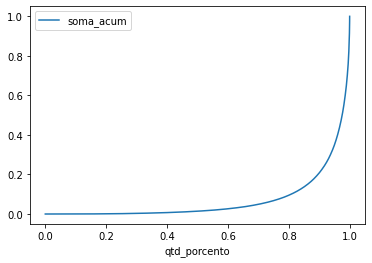

In [19]:
pagamentos_ordenados.plot.line(x='qtd_porcento', y='soma_acum')

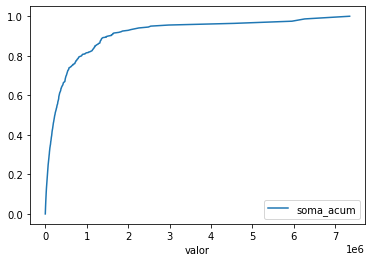

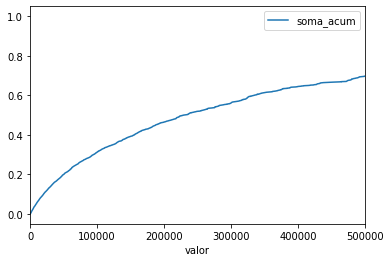

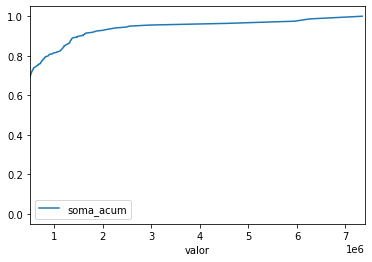

In [43]:
limite_superior = 500000

pagamentos_ordenados.plot.line(x='valor', y='soma_acum')
pagamentos_ordenados.plot.line(x='valor', y='soma_acum', xlim=[0, limite_superior])
pagamentos_ordenados.plot.line(x='valor', y='soma_acum', xlim=[limite_superior, 7400000])

Esses o primeiro plot apresenta uma boa descrição dos pagamentos - falta torná-lo claro.

Os de baixo apresentam coisas interessantes, porém talvez gráfico de linha não seja o melhor jeito de mostrar. Talvez colocando barras em cada faixa de valores (bin) pra mostrar quantos gastos existem naquela faixa de valores. E aí mostrar junto com a faixa do gasto. Aí você tem uma ideia de quanto foi gasto pra aquela faixa de valores, quanto isso representa do total, a quantos pagamentos isto corresponde e quanto o número anterior representa da quantidade total de pagamentos.

ATé minha explicação tá confusa.

Agora os valores parecem fazer sentido.

Existem 19.196 pagamentos

A média dos pagamentos é R$ 2.823,53

O desvio padrão é R$ 13.680,93

O menor valor dos pagamentos é 1 centavo. Ok, essa parte parece ser estranha. Existem 15 pagamentos abaixo de 1 real, 92 abaixo de 5 e 116 abaixo de 10. Parece fazer sentido. Segue o baba

O maior valor é R$ 7.344.698,00

### E depois tem as informações dos quartis: 

25% dos pagamentos são abaixo de R$ 612,48

metade abaixo de R$ 2.500

3/4 abaixo de R$ 12.584,05

# Visualizando os pagamentos

A visualização a seguir se inspira no scatter plot do [Painel COFOG](https://painel-cofog.tesouro.gov.br/dashboard_cofog.Rmd#section-especifica%C3%A7%C3%A3o-das-despesas---a%C3%A7%C3%A3o-de-governo).

Para isso, primeiro são definidos os clusters de acordo com o valor.

Depois, os gastos são separados e plotados por natureza.

- - - -

## Clustering

Primeiro, vamos visualizar os dados pra ver se existe alguma organização, algum insight sobre número de clusters ou qual algoritmo de cluster utilizar.

Estamos clusterizando só por valor, então podemos usar um histograma ou uma curva de densidade pra nos dar uma informação sobre a característica dos dados. Talvez um scatter plot em uma linha também dê alguma intuição sobre isso. Leia mais em: https://www.data-to-viz.com/story/OneNum.html

Primeiro, alguns checks de sanidade pra ver se os valores fazem sentido:

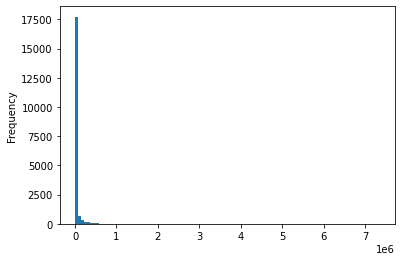

In [21]:
pagamentos.valor.plot.hist(bins=100)
# print(f'n: {n}\nBins: {bins}\nPatch: {patch}')

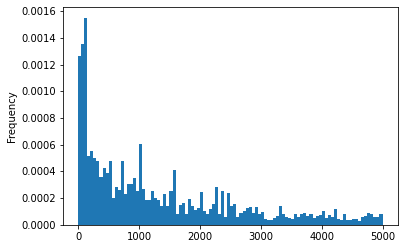

In [22]:
pagamentos.valor.plot.hist(bins=100, range=(0,5000), density=True)

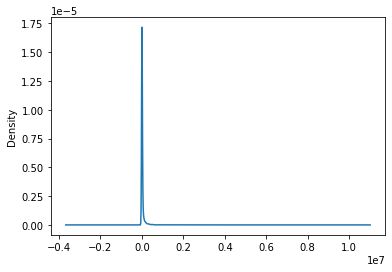

In [23]:
pagamentos.valor.plot.kde()

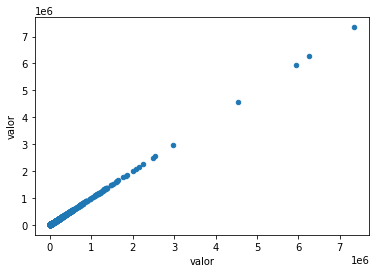

In [24]:
pagamentos.plot.scatter(x='valor', y='valor')

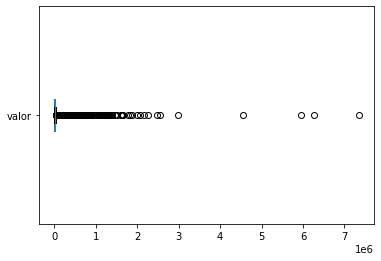

In [25]:
pagamentos.valor.plot.box(vert=False)

vou usar um algoritmo ingênuo de cluster: KMeans.

KMeans começa com inicialização aleatória dos centros, então é suceptível a mínimos locais. 

O que se faz é rodar o algoritmo várias vezes e avaliar qual foi a melhor versão e utilizá-la.

In [26]:
from sklearn.cluster import KMeans